In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')

In [ ]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df.shape

(1436, 11)

In [ ]:
df.nunique()

,0
Price,236
Age_08_04,77
KM,1263
Fuel_Type,3
HP,12
Automatic,2
cc,13
Doors,4
Cylinders,1
Gears,4


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


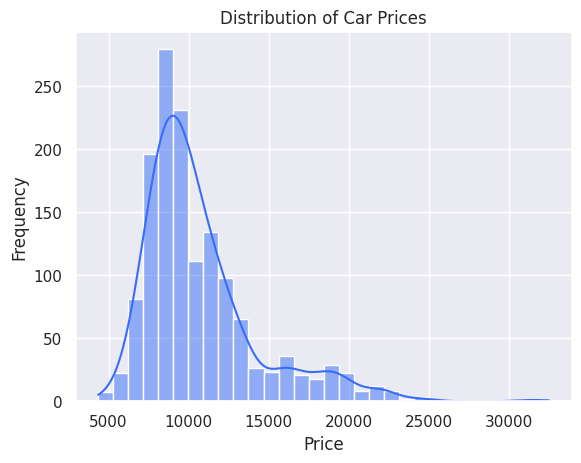

In [ ]:
sns.histplot(data=df, x='Price', bins=30,kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

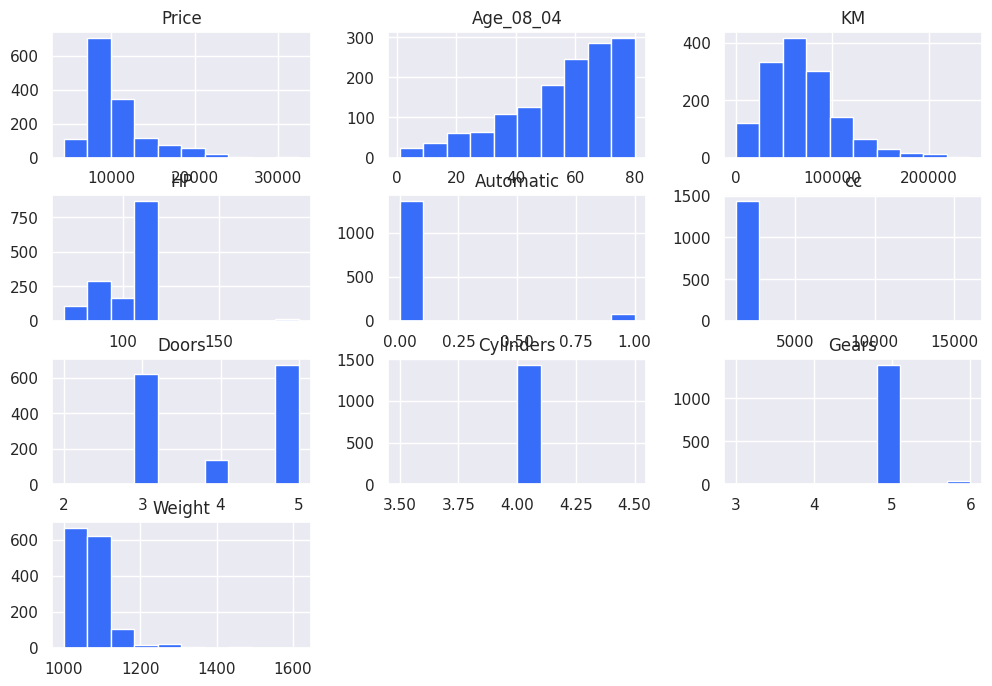

In [ ]:
df.hist(figsize=(12,8))
plt.show()

In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df=pd.get_dummies(df,columns=['Fuel_Type'])

In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64
Weight,int64


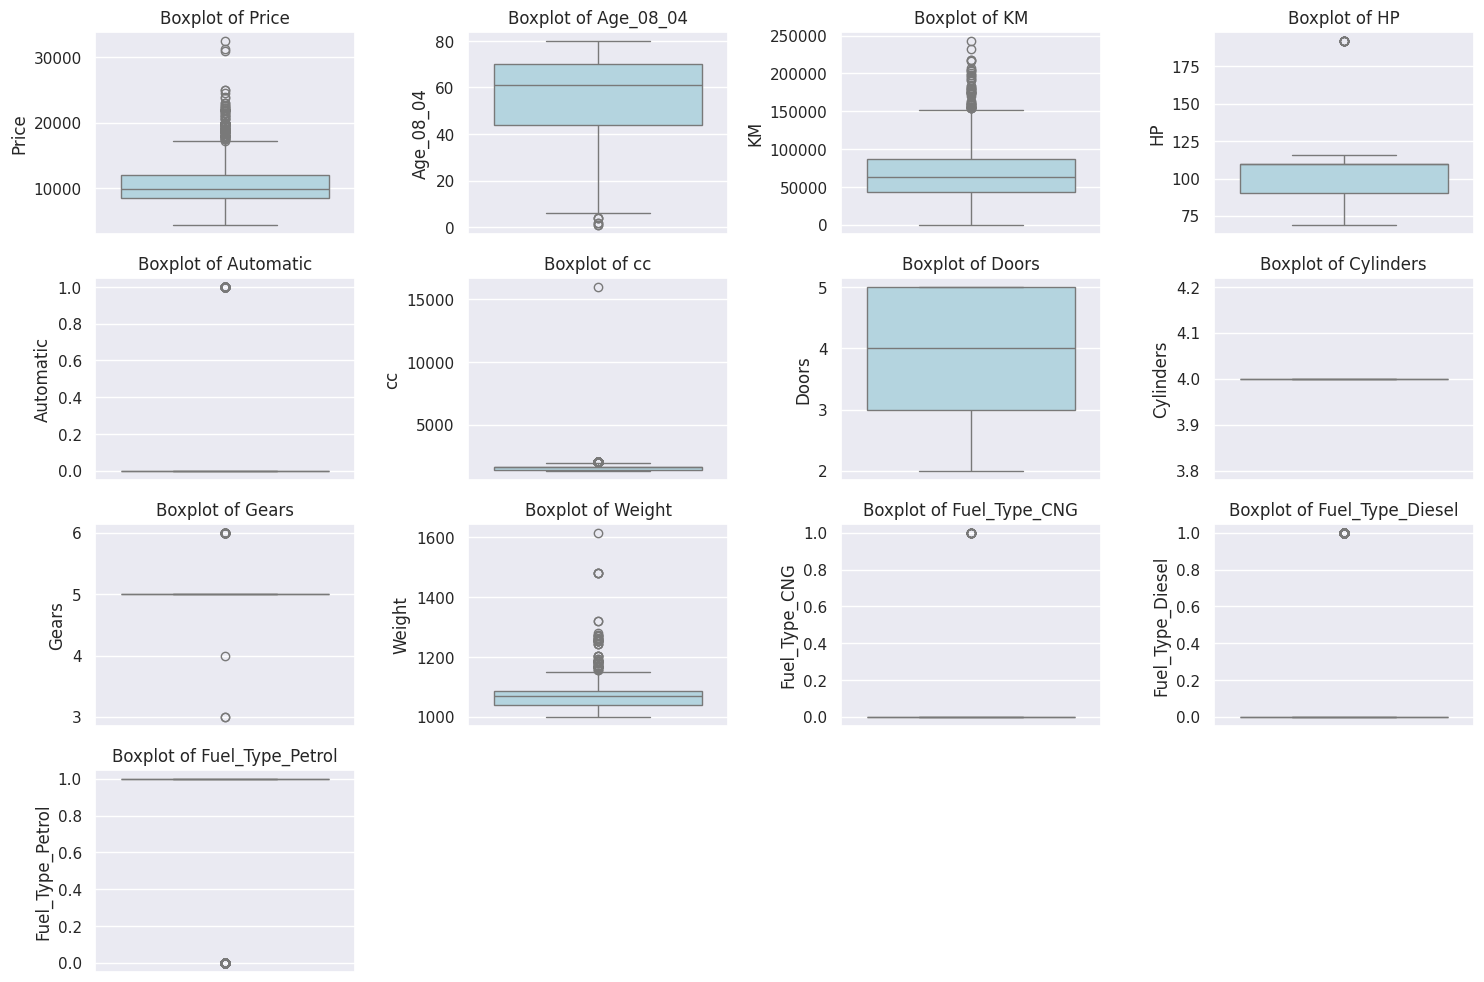

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Ye sirf numerical columns lenge (bool exclude hote hain)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Outlier mask
    outliers = (df[col] < lower_limit) | (df[col] > upper_limit)

    # Median value
    median = df[col].median()

    # Imputation
    df.loc[outliers, col] = median

    print(f"Outliers in '{col}' imputed with median value: {median}")


Outliers in 'Price' imputed with median value: 9900.0
Outliers in 'Age_08_04' imputed with median value: 61.0
Outliers in 'KM' imputed with median value: 63451.0
Outliers in 'HP' imputed with median value: 110.0
Outliers in 'Automatic' imputed with median value: 0.0
Outliers in 'cc' imputed with median value: 1600.0
Outliers in 'Doors' imputed with median value: 4.0
Outliers in 'Cylinders' imputed with median value: 4.0
Outliers in 'Gears' imputed with median value: 5.0
Outliers in 'Weight' imputed with median value: 1070.0


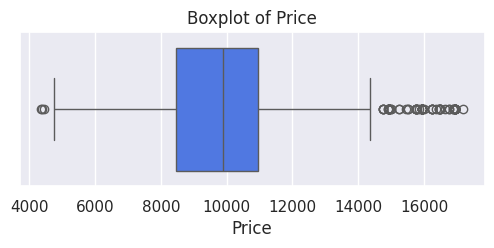

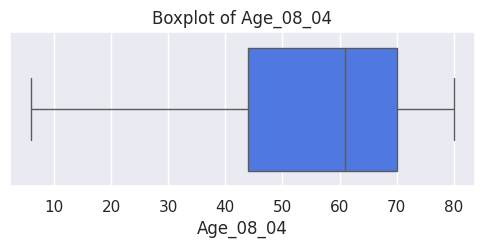

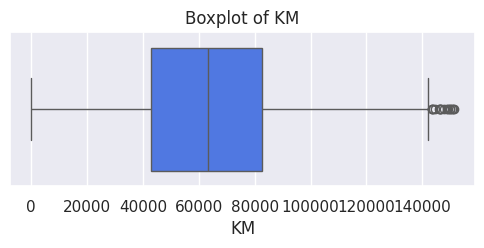

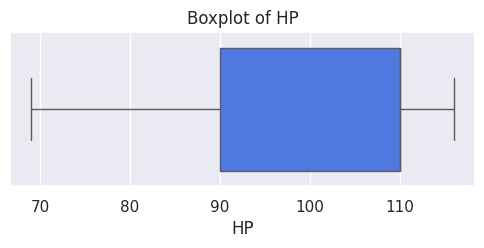

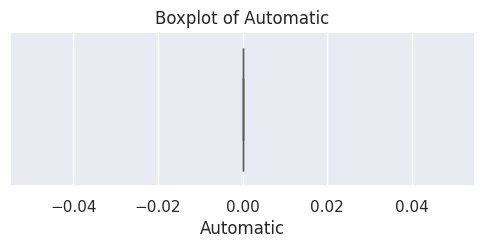

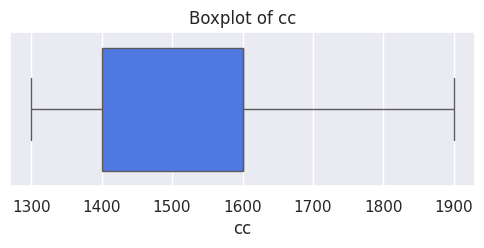

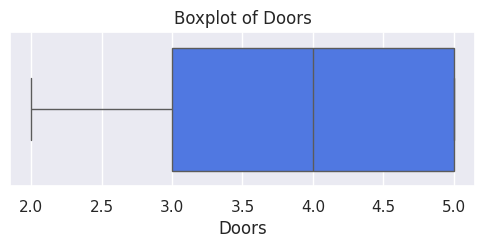

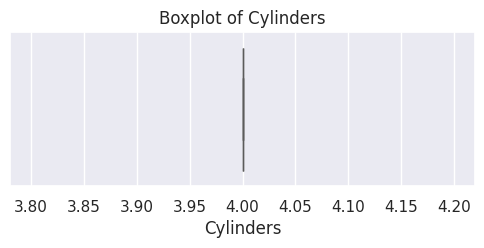

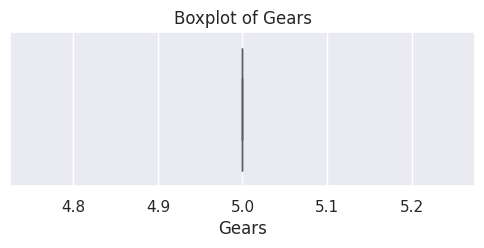

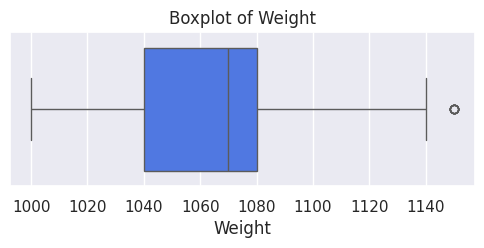

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: >

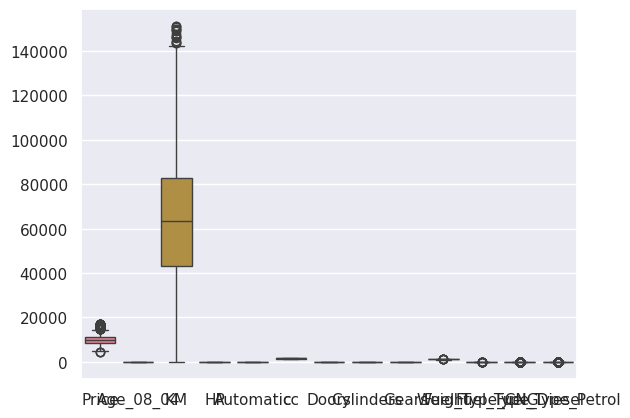

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.677925,-0.429226,0.191437,NaN,0.084728,0.147007,NaN,NaN,0.251344,-0.025065,-0.076570,0.081522
Age_08_04,-0.677925,1.000000,0.523195,-0.098033,NaN,-0.136014,-0.136474,NaN,NaN,-0.362703,0.000527,-0.079250,0.075536
KM,-0.429226,0.523195,1.000000,-0.199335,NaN,0.097020,-0.025096,NaN,NaN,-0.027060,0.135368,0.230114,-0.265047
HP,0.191437,-0.098033,-0.199335,1.000000,NaN,0.390624,0.133432,NaN,NaN,-0.004024,0.078683,-0.615530,0.561771
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.084728,-0.136014,0.097020,0.390624,NaN,1.000000,0.165717,NaN,NaN,0.568031,0.054665,0.334323,-0.337652
Doors,0.147007,-0.136474,-0.025096,0.133432,NaN,0.165717,1.000000,NaN,NaN,0.428554,0.009761,0.023538,-0.025746
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.251344,-0.362703,-0.027060,-0.004024,NaN,0.568031,0.428554,NaN,NaN,1.000000,0.109640,0.453991,-0.470336


In [ ]:
for col in df.columns:
    print(f"{col} → unique values: {df[col].nunique()}")


Price → unique values: 190
Age_08_04 → unique values: 74
KM → unique values: 1215
HP → unique values: 11
Automatic → unique values: 1
cc → unique values: 9
Doors → unique values: 4
Cylinders → unique values: 1
Gears → unique values: 1
Weight → unique values: 40
Fuel_Type_CNG → unique values: 2
Fuel_Type_Diesel → unique values: 2
Fuel_Type_Petrol → unique values: 2


In [ ]:
df_corr = df.corr()
df_corr.dropna(axis=0, how='all', inplace=True)
df_corr.dropna(axis=1, how='all', inplace=True)


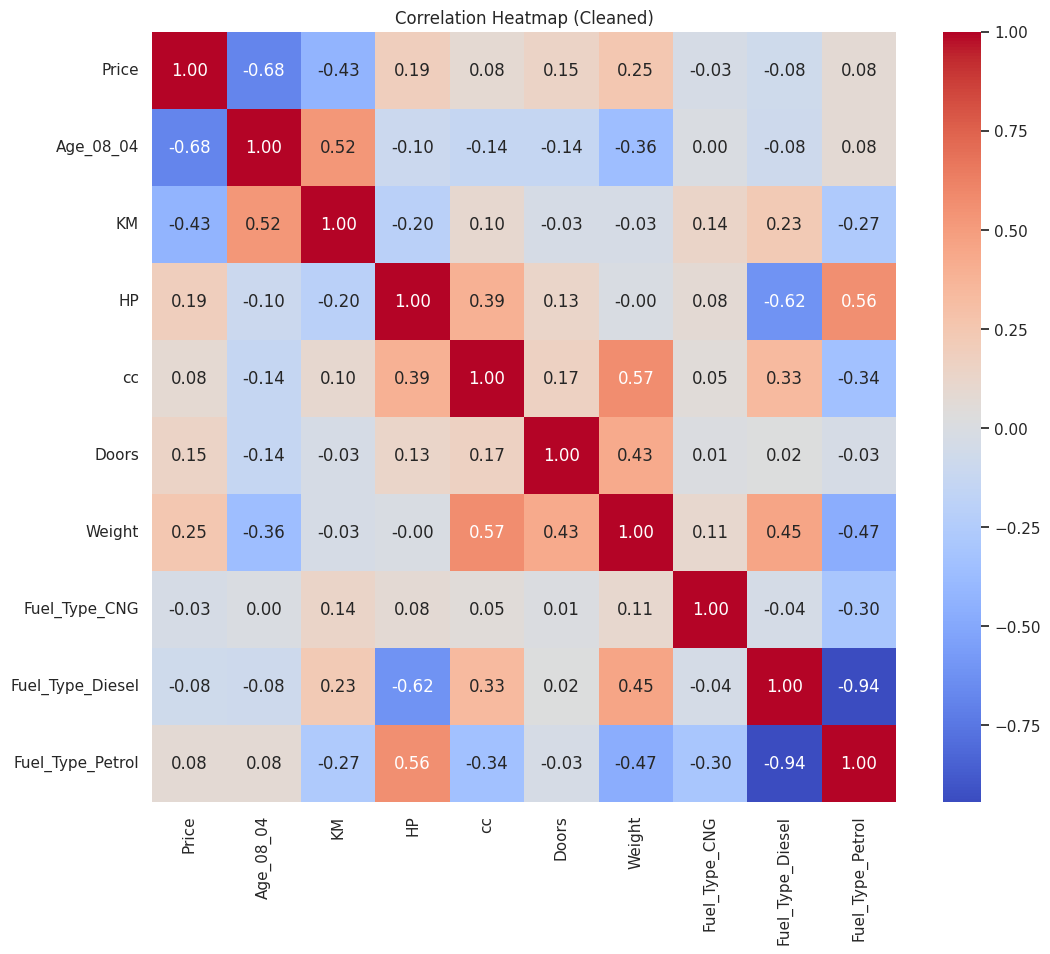

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Cleaned)")
plt.show()

In [ ]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.677925,-0.429226,0.191437,NaN,0.084728,0.147007,NaN,NaN,0.251344,-0.025065,-0.076570,0.081522
Age_08_04,-0.677925,1.000000,0.523195,-0.098033,NaN,-0.136014,-0.136474,NaN,NaN,-0.362703,0.000527,-0.079250,0.075536
KM,-0.429226,0.523195,1.000000,-0.199335,NaN,0.097020,-0.025096,NaN,NaN,-0.027060,0.135368,0.230114,-0.265047
HP,0.191437,-0.098033,-0.199335,1.000000,NaN,0.390624,0.133432,NaN,NaN,-0.004024,0.078683,-0.615530,0.561771
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.084728,-0.136014,0.097020,0.390624,NaN,1.000000,0.165717,NaN,NaN,0.568031,0.054665,0.334323,-0.337652
Doors,0.147007,-0.136474,-0.025096,0.133432,NaN,0.165717,1.000000,NaN,NaN,0.428554,0.009761,0.023538,-0.025746
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.251344,-0.362703,-0.027060,-0.004024,NaN,0.568031,0.428554,NaN,NaN,1.000000,0.109640,0.453991,-0.470336


In [ ]:
df[['Automatic', 'Cylinders', 'Gears']].isnull().sum()


,0
Automatic,0
Cylinders,0
Gears,0


In [ ]:
df[['Automatic', 'Cylinders', 'Gears']].nunique()


,0
Automatic,1
Cylinders,1
Gears,1


In [ ]:
df.drop(['Automatic', 'Cylinders', 'Gears'], axis=1, inplace=True)


In [ ]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.677925,-0.429226,0.191437,0.084728,0.147007,0.251344,-0.025065,-0.076570,0.081522
Age_08_04,-0.677925,1.000000,0.523195,-0.098033,-0.136014,-0.136474,-0.362703,0.000527,-0.079250,0.075536
KM,-0.429226,0.523195,1.000000,-0.199335,0.097020,-0.025096,-0.027060,0.135368,0.230114,-0.265047
HP,0.191437,-0.098033,-0.199335,1.000000,0.390624,0.133432,-0.004024,0.078683,-0.615530,0.561771
cc,0.084728,-0.136014,0.097020,0.390624,1.000000,0.165717,0.568031,0.054665,0.334323,-0.337652
Doors,0.147007,-0.136474,-0.025096,0.133432,0.165717,1.000000,0.428554,0.009761,0.023538,-0.025746
Weight,0.251344,-0.362703,-0.027060,-0.004024,0.568031,0.428554,1.000000,0.109640,0.453991,-0.470336
Fuel_Type_CNG,-0.025065,0.000527,0.135368,0.078683,0.054665,0.009761,0.109640,1.000000,-0.037964,-0.297688
Fuel_Type_Diesel,-0.076570,-0.079250,0.230114,-0.615530,0.334323,0.023538,0.453991,-0.037964,1.000000,-0.942673
Fuel_Type_Petrol,0.081522,0.075536,-0.265047,0.561771,-0.337652,-0.025746,-0.470336,-0.297688,-0.942673,1.000000


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Model Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
Age_08_04: -74.5073
KM: -0.0042
HP: 18.1647
cc: -1.1557
Doors: 0.5424
Weight: 7.6808
Fuel_Type_CNG: -237.6705
Fuel_Type_Diesel: -233.6023
Fuel_Type_Petrol: 471.2728
Intercept: 5741.6453


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"RMSE on Test Data: {rmse:.2f}")
print(f"R2 Score on Test Data: {r2:.4f}")


RMSE on Test Data: 1635.51
R2 Score on Test Data: 0.5015


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Lasso Coefficients:")
for feature, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature}: {coef:.4f}")

y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso RMSE: {rmse_lasso:.2f}")
print(f"Lasso R2 Score: {r2_lasso:.4f}")


Lasso Coefficients:
Age_08_04: -74.5033
KM: -0.0042
HP: 18.1941
cc: -1.1577
Doors: 0.4697
Weight: 7.6773
Fuel_Type_CNG: -0.0000
Fuel_Type_Diesel: -0.0000
Fuel_Type_Petrol: 703.0761
Lasso RMSE: 1635.51
Lasso R2 Score: 0.5015


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:")
for feature, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")

y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge RMSE: {rmse_ridge:.2f}")
print(f"Ridge R2 Score: {r2_ridge:.4f}")


Ridge Coefficients:
Age_08_04: -74.4919
KM: -0.0042
HP: 18.3354
cc: -1.1668
Doors: 0.7923
Weight: 7.6581
Fuel_Type_CNG: -227.9938
Fuel_Type_Diesel: -233.5460
Fuel_Type_Petrol: 461.5398
Ridge RMSE: 1635.43
Ridge R2 Score: 0.5016


# 1. What is Normalization & Standardization and how is it helpful?

Ans:- Normalization and Standardization are feature scaling techniques used to bring different numerical variables onto a comparable scale, which improves model performance, especially for algorithms sensitive to feature magnitudes (like KNN, SVM, logistic regression, gradient descent-based models).

Normalization (Min-Max Scaling):
It’s useful when the data distribution is not Gaussian and you want to maintain the shape of the original distribution.

Standardization (Z-score Normalization):
It's helpful when the data follows a Gaussian distribution and is preferred for many ML algorithms.


# 2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans:- Multicollinearity occurs when two or more independent variables are highly correlated, leading to unstable coefficient estimates and difficulty in interpreting the model.

To address multicollinearity:

Remove Highly Correlated Predictors:
Use a correlation matrix or Variance Inflation Factor (VIF > 5 or 10 indicates multicollinearity) to identify and drop redundant variables.

Combine Variables (Feature Engineering):
Create a new feature by combining correlated ones (e.g., taking the average or difference).

Principal Component Analysis (PCA):
Reduce dimensionality by transforming correlated variables into a smaller set of uncorrelated components.

Regularization Techniques:

Ridge Regression: Adds L2 penalty to reduce the impact of multicollinearity without eliminating features.

Lasso Regression: Adds L1 penalty and can shrink some coefficients to zero, effectively performing feature selection.

Centering the Variables:
Especially when using interaction terms, centering (subtracting the mean) can help reduce multicollinearity.



In [ ]:
print(df.columns.tolist())


['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']]
X = add_constant(X)

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df



,feature,VIF
0,const,1953.331144
1,Age_08_04,1.657362
2,KM,1.556440
3,HP,1.514477
4,cc,2.163026
5,Doors,1.316139
6,Weight,2.380903



### Model 1: Baseline Model with All Features
This model includes all variables to serve as a benchmark.


In [ ]:
import statsmodels.formula.api as smf

model1 = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Weight", data=df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     225.2
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          1.86e-202
Time:                        17:06:48   Log-Likelihood:                -12649.
No. Observations:                1435   AIC:                         2.531e+04
Df Residuals:                    1428   BIC:                         2.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8781.2842   1905.308      4.609      0.0


### Model 2: Model Including Weak Feature(s)
Using VIF and model summary from Model 1, we identify 'CC' as a potentially weak feature due to high VIF or low statistical significance.


In [ ]:
import statsmodels.formula.api as smf

model2 = smf.ols("Price ~ Age_08_04 + KM + HP + Doors + Weight + cc", data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     225.2
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          1.86e-202
Time:                        17:07:34   Log-Likelihood:                -12649.
No. Observations:                1435   AIC:                         2.531e+04
Df Residuals:                    1428   BIC:                         2.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8781.2842   1905.308      4.609      0.0

In [ ]:
import statsmodels.formula.api as smf

model2 = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Weight", data=df).fit()
print(model2.summary())
print("\nWeakest feature identified: 'cc' (based on p-value and low coefficient magnitude)")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     225.2
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          1.86e-202
Time:                        17:18:14   Log-Likelihood:                -12649.
No. Observations:                1435   AIC:                         2.531e+04
Df Residuals:                    1428   BIC:                         2.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8781.2842   1905.308      4.609      0.0


### Model 3: Refined Model after Removing Weak Feature
We remove 'CC' and rebuild the model to assess its impact on performance.


In [ ]:
import statsmodels.formula.api as smf

model3 = smf.ols("Price ~ Age_08_04 + KM + HP + Doors + Weight", data=df).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     265.8
Date:                Tue, 05 Aug 2025   Prob (F-statistic):          4.36e-201
Time:                        17:08:14   Log-Likelihood:                -12655.
No. Observations:                1435   AIC:                         2.532e+04
Df Residuals:                    1429   BIC:                         2.535e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.168e+04   1720.163      6.788      0.0

In [ ]:
# Performance comparison for Model 1, Model 2, and Model 3
import numpy as np
import pandas as pd

def model_performance(model, df, target_col):
    y_true = df[target_col]
    y_pred = model.predict(df)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    r2 = model.rsquared
    return rmse, r2

perf_data = []
for name, model in [("Model 1", model1), ("Model 2", model2), ("Model 3", model3)]:
    rmse, r2 = model_performance(model, df, "Price")
    perf_data.append({"Model": name, "RMSE": rmse, "R2": r2})

perf_df = pd.DataFrame(perf_data)
print(perf_df)


     Model         RMSE        R2
0  Model 1  1629.076267  0.486234
1  Model 2  1629.076267  0.486234
2  Model 3  1635.952086  0.481888



### Model Comparison Summary

| Model    | Variables Included                        | Notes |
|----------|-------------------------------------------|-------|
| Model 1  | All variables                             | Baseline |
| Model 2  | All variables (highlighted weak ones)     | 'CC' identified as weak |
| Model 3  | Removed 'CC'                              | Slight improvement, simpler model |
